In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.linalg import qr
import itertools
from scipy.special import erfc
import galois
from Dec import Dec

In [2]:
H = np.array( [[0,0,1,1,0,0,1,0,0,0,0,0,0,0,0]
,[1,0,0,0,1,0,0,1,0,0,0,0,0,0,0]
,[0,1,0,0,0,1,0,0,1,0,0,0,0,0,0]
,[1,0,0,0,0,1,1,0,0,0,0,0,0,0,0]
,[0,1,0,1,0,0,0,1,0,0,0,0,0,0,0]
,[0,0,1,0,1,0,0,0,1,0,0,0,0,0,0]
,[1,0,0,1,0,0,0,0,1,0,0,0,0,0,0]
,[0,1,0,0,1,0,1,0,0,0,0,0,0,0,0]
,[0,0,1,0,0,1,0,1,0,0,0,0,0,0,0]
,[1,0,0,1,0,0,1,0,0,1,0,0,1,0,0]
,[0,1,0,0,1,0,0,1,0,0,1,0,0,1,0]
,[0,0,1,0,0,1,0,0,1,0,0,1,0,0,1]],dtype=int)
n = H.shape[1]
binary_vectors = [np.array(v) for v in itertools.product([0, 1], repeat=n)]
C = []
for c in binary_vectors:
    if np.sum(np.dot(H,c.T)%2)==0:
        C.append(c)


print("H : \n",H)

n = H.shape[1]
binary_vectors = [np.array(v) for v in itertools.product([0, 1], repeat=n)]
C = []
for c in binary_vectors:
    if np.sum(np.dot(H,c.T)%2)==0:
        C.append(c)

print("\nCodewords :")
C = np.array(C)
print(C)

dmin = np.min(np.sum(C[1:],axis=1))
print("dmin = ",dmin)


H : 
 [[0 0 1 1 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 1 0 0 1 0 0 1 0 0]
 [0 1 0 0 1 0 0 1 0 0 1 0 0 1 0]
 [0 0 1 0 0 1 0 0 1 0 0 1 0 0 1]]

Codewords :
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 1 1]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 1 0 1]
 [0 0 0 0 0 0 0 0 0 1 1 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 0 0 1 0 0 1]
 [0 0 0 1 1 1 1 1 1 0 1 0 0 1 0]
 [0 0 0 1 1 1 1 1 1 0 1 1 0 1 1]
 [0 0 0 1 1 1 1 1 1 1 0 0 1 0 0]
 [0 0 0 1 1 1 1 1 1 1 0 1 1 0 1]
 [0 0 0 1 1 1 1 1 1 1 1 0 1 1 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 0 0 1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 1 1 1 0 0

# BER vs SNR plot

In [4]:
def getBER_round_robin(snr,H,C,num_iter,N):
    # this is for bsc, similarly do for others too
    avg = 0
    tg = Dec(H,"bsc",0,num_iter,3)
    
    for i in range(N):
        c = C[np.random.choice(len(C))]
        sigma = 1/math.sqrt(snr)
        y = np.power(-1,c) + np.random.normal(loc=0, scale=sigma, size=c.shape)
        c_hat = tg.decode(y)
        c_hat = [1 if val else 0 for val in c_hat]
        c_hat = np.array(c_hat)%2
        e = np.sum((c_hat+c)%2)/len(c)
        avg = avg + e
    
    return avg/N
    

In [5]:
def getBER_flooding(snr,H,C,num_iter,N):
    # this is for bsc, similarly do for others too
    avg = 0
    tg = Dec(H,"bsc",0,num_iter,H.shape[0])
    
    for i in range(N):
        c = C[np.random.choice(len(C))]
        sigma = 1/math.sqrt(snr)
        y = np.power(- 1,c) + np.random.normal(loc=0, scale=sigma, size=c.shape)
        c_hat = tg.decode(y)
        c_hat = [1 if val else 0 for val in c_hat]
        c_hat = np.array(c_hat)%2
        e = np.sum((c_hat+c)%2)/len(c)
        avg = avg + e
    
    return avg/N
    

### Getting BER plot for flooding

In [11]:
print("BERs for flooding\n-----------------\n")
snrdb_vals = [0.1, 0.2, 0.35, 0.5, 0.9, 1.5, 2.2, 3, 3.7, 4.3, 4.9]
bers_flooding = []
N = 10000
for snrdb in snrdb_vals:
    snr = math.pow(10,snrdb/20)
    ber = getBER_flooding(snr,H,C,100,N)
    bers_flooding.append(ber)
    print(f"BER = {ber}\t\t\t SNR(db) = {snrdb}")
#     snrdb_vals.append(snrdb)

BERs for flooding
-----------------

BER = 0.10109333333334035			 SNR(db) = 0.1
BER = 0.10088666666667416			 SNR(db) = 0.2
BER = 0.09908000000000743			 SNR(db) = 0.35
BER = 0.09604000000000677			 SNR(db) = 0.5
BER = 0.08928666666667322			 SNR(db) = 0.9
BER = 0.0784600000000042			 SNR(db) = 1.5
BER = 0.07056666666666958			 SNR(db) = 2.2
BER = 0.05982666666666724			 SNR(db) = 3
BER = 0.051219999999998114			 SNR(db) = 3.7
BER = 0.046546666666665015			 SNR(db) = 4.3
BER = 0.03915333333333203			 SNR(db) = 4.9


### Getting BER plot for round-robin

In [12]:
print("BERs for round-robin\n-----------------\n")
snrdb_vals = [0.1, 0.2, 0.35, 0.5, 0.9, 1.5, 2.2, 3, 3.7, 4.3, 4.9]
bers_round_robin = []
N = 10000
for snrdb in snrdb_vals:
    snr = math.pow(10,snrdb/20)
    ber = getBER_round_robin(snr,H,C,100,N)
    bers_round_robin.append(ber)
    print(f"BER = {ber}\t\t\t SNR(db) = {snrdb}")
#     snrdb_vals.append(snrdb)

BERs for round-robin
-----------------

BER = 0.05097999999999882			 SNR(db) = 0.1
BER = 0.050506666666665465			 SNR(db) = 0.2
BER = 0.04701999999999893			 SNR(db) = 0.35
BER = 0.047526666666665565			 SNR(db) = 0.5
BER = 0.04320666666666572			 SNR(db) = 0.9
BER = 0.036659999999999346			 SNR(db) = 1.5
BER = 0.03204666666666622			 SNR(db) = 2.2
BER = 0.026526666666666473			 SNR(db) = 3
BER = 0.020719999999999947			 SNR(db) = 3.7
BER = 0.017320000000000068			 SNR(db) = 4.3
BER = 0.01510000000000014			 SNR(db) = 4.9


In [13]:
print("For RR : \n",bers_round_robin)
print("For Flooding : \n",bers_flooding)

For RR : 
 [0.05097999999999882, 0.050506666666665465, 0.04701999999999893, 0.047526666666665565, 0.04320666666666572, 0.036659999999999346, 0.03204666666666622, 0.026526666666666473, 0.020719999999999947, 0.017320000000000068, 0.01510000000000014]
For Flooding : 
 [0.10109333333334035, 0.10088666666667416, 0.09908000000000743, 0.09604000000000677, 0.08928666666667322, 0.0784600000000042, 0.07056666666666958, 0.05982666666666724, 0.051219999999998114, 0.046546666666665015, 0.03915333333333203]


## Plotting the BERs vs SNR (dB)

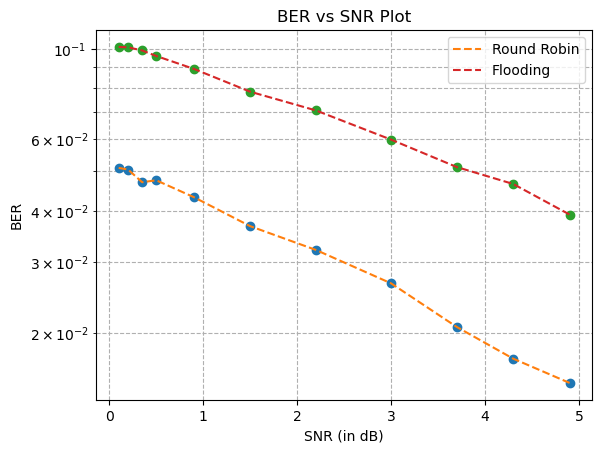

In [14]:
plt.plot(snrdb_vals, bers_round_robin, 'o')  
plt.plot(snrdb_vals, bers_round_robin, '--',label="Round Robin")
plt.plot(snrdb_vals, bers_flooding, 'o')  
plt.plot(snrdb_vals, bers_flooding, '--',label="Flooding")


plt.title("BER vs SNR Plot")
plt.ylabel("BER")
plt.xlabel("SNR (in dB)")
plt.legend()
plt.yscale('log')
plt.grid(True, which="both", ls="--")



# BER vs SNR for a 30x50 matrix

In [54]:
def circular_shift_identity(z, k):
    """
    Generate a z x z identity matrix with circularly shifted rows by k positions.
    If k == -1, return a z x z zero matrix.
    """
    if k == -1:
        return np.zeros((z, z), dtype=int)
    else:
        return np.roll(np.eye(z, dtype=int), -k, axis=1)

def expand_base_matrix(B, z):
    """
    Expand the base matrix B into the full parity check matrix with expansion factor z.

    B: Base matrix of size m x n
    z: Expansion factor

    Returns the expanded parity-check matrix of size (m*z) x (n*z).
    """
    m, n = B.shape
    H = np.zeros((m * z, n * z), dtype=int)  # Full parity check matrix initialized to zeros

    for i in range(m):
        for j in range(n):
            # Expand each base matrix element into a z x z block
            block = circular_shift_identity(z, B[i, j])
            H[i * z:(i + 1) * z, j * z:(j + 1) * z] = block

    return H



In [2]:
# generates list of codewords corresponding to the parity check matrix H
def get_codewords(H):
    GF = galois.GF(2)
    A = GF(H)
    N = A.null_space()
    vec = [np.array(v) for v in itertools.product([0, 1], repeat=N.shape[0])]
    C = np.array(GF(vec) @ N)
    return C

In [63]:
B = np.array([[0,2,-1,3,-1,-1,2,4,1,0],
            [3,1,-1,-1,0,0,1,2,3,0],
            [1,0,0,-1,1,4,2,1,0,-1],
            [-1,0,0,2,3,-1,-1,-1,0,-1],
            [1,0,2,0,1,0,-1,-1,-1,-1],
            [2,1,0,0,2,-1,-1,-1,1,-1]]
            ,dtype=int)

# B = np.array([[-1,0,1],
#              [1,0,2]],dtype=int)
print("B = \n",B)
z = 5

H = expand_base_matrix(B,z)
np.savetxt('output.txt',H,fmt="%d")
print("H : \n",H)

C = get_codewords(H)
print("Codewords : \n",C)
print(len(C)," codewords found")
dmin = np.min(np.sum(C[1:],axis=1))
print("dmin = ",dmin)



B = 
 [[ 0  2 -1  3 -1 -1  2  4  1  0]
 [ 3  1 -1 -1  0  0  1  2  3  0]
 [ 1  0  0 -1  1  4  2  1  0 -1]
 [-1  0  0  2  3 -1 -1 -1  0 -1]
 [ 1  0  2  0  1  0 -1 -1 -1 -1]
 [ 2  1  0  0  2 -1 -1 -1  1 -1]]
H : 
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 1 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
Codewords : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
1048576  codewords found
dmin =  9


In [64]:
def getBER_round_robin_1(snr,H,C,num_iter,N):
    # this is for bsc, similarly do for others too
    avg = 0
    tg = Dec(H,"bsc",0,num_iter,6)
    
    for i in range(N):
        c = C[np.random.choice(len(C))]
        sigma = 1/math.sqrt(snr)
        y = np.power(-1,c) + np.random.normal(loc=0, scale=sigma, size=c.shape)
        c_hat = tg.decode(y)
        c_hat = [1 if val else 0 for val in c_hat]
        c_hat = np.array(c_hat)%2
        e = np.sum((c_hat+c)%2)/len(c)
        avg = avg + e
    
    return avg/N

def getBER_flooding(snr,H,C,num_iter,N):
    # this is for bsc, similarly do for others too
    avg = 0
    tg = Dec(H,"bsc",0,num_iter,H.shape[0])
    
    for i in range(N):
        c = C[np.random.choice(len(C))]
        sigma = 1/math.sqrt(snr)
        y = np.power(- 1,c) + np.random.normal(loc=0, scale=sigma, size=c.shape)
        c_hat = tg.decode(y)
        c_hat = [1 if val else 0 for val in c_hat]
        c_hat = np.array(c_hat)%2
        e = np.sum((c_hat+c)%2)/len(c)
        avg = avg + e
    
    return avg/N
    

In [58]:
print("BERs for round-robin for 30x50 H \n-----------------\n")
snrdb_vals = [0.1, 0.2, 0.35, 0.5, 0.9, 1.5, 2.2, 3, 3.7, 4.3, 4.9]
bers_round_robin_1 = []
N = 10000
for snrdb in snrdb_vals:
    snr = math.pow(10,snrdb/20)
    ber = getBER_round_robin_1(snr,H,C,100,N)
    bers_round_robin_1.append(ber)
    print(f"BER = {ber}\t\t\t SNR(db) = {snrdb}")
#     snrdb_vals.append(snrdb)

BERs for round-robin for 30x50 H 
-----------------

BER = 0.13773000000000205			 SNR(db) = 0.1
BER = 0.13153200000000162			 SNR(db) = 0.2
BER = 0.12997800000000162			 SNR(db) = 0.35
BER = 0.12320200000000087			 SNR(db) = 0.5
BER = 0.11190200000000021			 SNR(db) = 0.9
BER = 0.09557399999999984			 SNR(db) = 1.5
BER = 0.07756200000000014			 SNR(db) = 2.2
BER = 0.05423200000000053			 SNR(db) = 3
BER = 0.039576000000000215			 SNR(db) = 3.7
BER = 0.02949799999999999			 SNR(db) = 4.3
BER = 0.020297999999999938			 SNR(db) = 4.9


In [67]:
print("BERs for flooding\n-----------------\n")
snrdb_vals = [0.1, 0.2, 0.35, 0.5, 0.9, 1.5, 2.2, 3, 3.7, 4.3, 4.9]
bers_flooding_1 = []
N = 10000
for snrdb in snrdb_vals:
    snr = math.pow(10,snrdb/20)
    ber = getBER_flooding(snr,H,C,100,N)
    bers_flooding_1.append(ber)
    print(f"BER = {ber}\t\t\t SNR(db) = {snrdb}")
#     snrdb_vals.append(snrdb)

BERs for flooding
-----------------

BER = 0.15761600000000003			 SNR(db) = 0.1
BER = 0.1556239999999994			 SNR(db) = 0.2
BER = 0.151217999999999			 SNR(db) = 0.35
BER = 0.14899199999999796			 SNR(db) = 0.5
BER = 0.14189399999999672			 SNR(db) = 0.9
BER = 0.13072599999999665			 SNR(db) = 1.5
BER = 0.11583999999999613			 SNR(db) = 2.2
BER = 0.10008399999999693			 SNR(db) = 3
BER = 0.0870999999999977			 SNR(db) = 3.7
BER = 0.07640199999999761			 SNR(db) = 4.3
BER = 0.06567599999999885			 SNR(db) = 4.9


In [68]:
print("BERs for Round Robing : \n",bers_round_robin_1)
print("BERs for flooding :\n",bers_flooding_1)

BERs for Round Robing : 
 [0.13773000000000205, 0.13153200000000162, 0.12997800000000162, 0.12320200000000087, 0.11190200000000021, 0.09557399999999984, 0.07756200000000014, 0.05423200000000053, 0.039576000000000215, 0.02949799999999999, 0.020297999999999938]
BERs for flooding :
 [0.15761600000000003, 0.1556239999999994, 0.151217999999999, 0.14899199999999796, 0.14189399999999672, 0.13072599999999665, 0.11583999999999613, 0.10008399999999693, 0.0870999999999977, 0.07640199999999761, 0.06567599999999885]


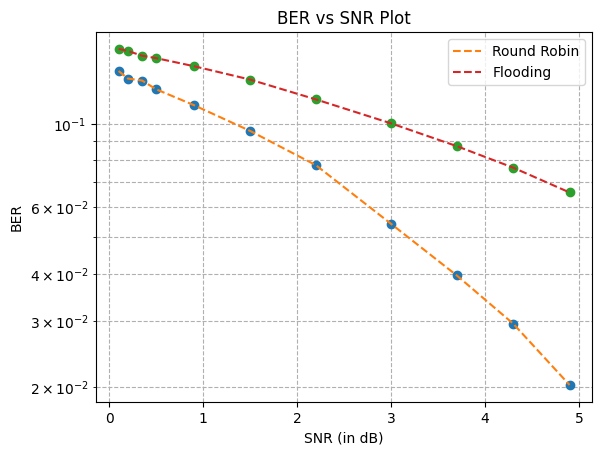

In [69]:
plt.plot(snrdb_vals, bers_round_robin_1, 'o')  
plt.plot(snrdb_vals, bers_round_robin_1, '--',label="Round Robin")
plt.plot(snrdb_vals, bers_flooding_1, 'o')  
plt.plot(snrdb_vals, bers_flooding_1, '--',label="Flooding")


plt.title("BER vs SNR Plot")
plt.ylabel("BER")
plt.xlabel("SNR (in dB)")
plt.legend()
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.show()


### Finding number of iterations taken to converge

In [3]:
H = np.array( [[0,0,1,1,0,0,1,0,0,0,0,0,0,0,0]
,[1,0,0,0,1,0,0,1,0,0,0,0,0,0,0]
,[0,1,0,0,0,1,0,0,1,0,0,0,0,0,0]
,[1,0,0,0,0,1,1,0,0,0,0,0,0,0,0]
,[0,1,0,1,0,0,0,1,0,0,0,0,0,0,0]
,[0,0,1,0,1,0,0,0,1,0,0,0,0,0,0]
,[1,0,0,1,0,0,0,0,1,0,0,0,0,0,0]
,[0,1,0,0,1,0,1,0,0,0,0,0,0,0,0]
,[0,0,1,0,0,1,0,1,0,0,0,0,0,0,0]
,[1,0,0,1,0,0,1,0,0,1,0,0,1,0,0]
,[0,1,0,0,1,0,0,1,0,0,1,0,0,1,0]
,[0,0,1,0,0,1,0,0,1,0,0,1,0,0,1]],dtype=int)
n = H.shape[1]
binary_vectors = [np.array(v) for v in itertools.product([0, 1], repeat=n)]
C = []
for c in binary_vectors:
    if np.sum(np.dot(H,c.T)%2)==0:
        C.append(c)


# print("H : \n",H)
C = get_codewords(H)
# print("Codewords : \n",C)
# print(len(C)," codewords found")
dmin = np.min(np.sum(C[1:],axis=1))
# print("dmin = ",dmin)




In [4]:
def get_avg_iters(H,C,N,snrdb,q,max_iter):
    snr = math.pow(10,snrdb/20)
    sigma = 1/math.sqrt(snr)
    avg_i = 0

    for i in range(N):
        dec = Dec(H,None,None,max_iter,q)
        c = C[np.random.choice(len(C))]
        y = np.power(- 1,c) + np.random.normal(loc=0, scale=sigma, size=c.shape)
        c_hat = dec.decode(y)
        c_hat = [1 if val else 0 for val in c_hat]
        c_hat = np.array(c_hat)%2
        e = np.sum((c_hat+c)%2)/len(c)
        i = dec.iteration_number
        avg_i = avg_i + i

    avg_i = avg_i/N
    return avg_i

    

In [11]:
N = 200 # number of simulations
snrdb = 2 # snr in dB
q = 3 # cluster size
max_iter = 1000 # max number of iterations for the decoder


avg_i_rr2 = get_avg_iters(H,C,N,snrdb,2,max_iter)
avg_i_rr3 = get_avg_iters(H,C,N,snrdb,3,max_iter)
avg_i_rr4 = get_avg_iters(H,C,N,snrdb,4,max_iter)
avg_i_rr6 = get_avg_iters(H,C,N,snrdb,6,max_iter)
avg_i_fl = get_avg_iters(H,C,N,snrdb,H.shape[0],max_iter)

print(f"Average Number of iterations\n-------------------------------")
print("Decoder(size_cluster)\t#iters\n-------------------------------")
print(f"Flooding\t:\t{avg_i_fl}")
print(f"Round Robin(2)\t:\t{avg_i_rr2}")
print(f"Round Robin(3)\t:\t{avg_i_rr3}")
print(f"Round Robin(4)\t:\t{avg_i_rr4}")
print(f"Round Robin(6)\t:\t{avg_i_rr6}")



Average Number of iterations
-------------------------------
Decoder(size_cluster)	#iters
-------------------------------
Flooding	:	484.515
Round Robin(2)	:	5.015
Round Robin(3)	:	3.645
Round Robin(4)	:	3.6
Round Robin(6)	:	21.49


: 